## 다항회귀와 과대적합/과소적합 이해

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures

In [3]:
# 다항 회귀에 사용한 원 데이터 생성 : 2행 X 2열
X = np.arange(4).reshape(2,2)
X

array([[0, 1],
       [2, 3]])

In [5]:
# degree = 2 로 주어서 데이터 확장해보기

# poly 객체 생성
poly = PolynomialFeatures(degree=2)
# 데이터 파생시킬 식 구성(학습)
poly.fit(X)
# 데이터 파생
poly_ftr = poly.transform(X)

print('원래 데이터', X)
print('변화된 데이터 ', poly_ftr)

원래 데이터 [[0 1]
 [2 3]]
변화된 데이터  [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


[x1,x2]  =>degree2 => [1, x1, x2, x1^2, x1*x2, x2^2]
- 2개의 데이터에 근거하여 6개의 피처가 파생되어 생성되었음

In [8]:
# X : 행렬 (ndarray 형태) => 브로드캐스팅 됨.
def polynomial_func(X):
    y = 1 + 2 * X + X**2 + X**3
    return y

X = np.arange(4).reshape(2,2)
print('일차 단항식 feature : \n', X)
y= polynomial_func(X)
print('삼차 다항식 결정값 : \n', y)

일차 단항식 feature : 
 [[0 1]
 [2 3]]
삼차 다항식 결정값 : 
 [[ 1  5]
 [17 43]]


### PolynomialFeautures => 성능향상 목적 (feature 의 개수가 적을 경우, 데이터를 확장시켜 보다 정밀한 학습을 시키기 위함)

In [12]:

poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)

print('일차 단항식 feature : \n', X)
print('3차 다항식 feature :\n', poly_ftr)
print('삼차 다항식 결정값 : \n', y)

일차 단항식 feature : 
 [[0 1]
 [2 3]]
3차 다항식 feature :
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
삼차 다항식 결정값 : 
 [[ 1  5]
 [17 43]]


In [14]:
# 확장된 데이터로 학습 진행 후, 해당 모델의 회귀계수(가중치) 출력
# 모델 : 선형 회귀
from sklearn.linear_model import LinearRegression

print('3차 다항식 feature :\n', poly_ftr)

model = LinearRegression()
# 파생 데이터 학습
model.fit(poly_ftr, y)
print('Polynomial 회귀 계수\n' , np.round(model.coef_, 2))
print('Polynomial 회귀 Shape : ', model.coef_.shape)

3차 다항식 feature :
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수
 [[0.   0.02 0.02 0.05 0.07 0.1  0.1  0.14 0.22 0.31]
 [0.   0.06 0.06 0.11 0.17 0.23 0.23 0.34 0.51 0.74]]
Polynomial 회귀 Shape :  (2, 10)


In [15]:
# Pipeline class : 처리 순서를 지정해서 일괄처리
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

def polynomial_func(X):
    y = 1 + 2 * X + X ** 2 + X ** 3
    return y

# Pipeline 객체로 Streamline 하게 Polynomial Feature변환과 Linear Regression을 연결
model = Pipeline([         # 처리 순서에 따른 일단위가 input이 된다.
      ('poly', PolynomialFeatures(degree=3))  # 'poly' 는 생성될 객체의 변수명
    , ('linear', LinearRegression())         # 'linear' : poly 객체인풋(features) 기반으로 선형회귀 객체가 생성됨 
])

#  원래 데이터 생성
X = np.arange(4).reshape(2,2)
# 원래 답 생성
y = polynomial_func(X)

model.fit(X,y)
# 계수 출력, pipeline 객체 안의 객체를 named_steps[]로 접근할수 있다.(key,value 구조)
print('회귀계수 출력 : \n' , np.round(model.named_steps['linear'].coef_,2))


회귀계수 출력 : 
 [[0.   0.02 0.02 0.05 0.07 0.1  0.1  0.14 0.22 0.31]
 [0.   0.06 0.06 0.11 0.17 0.23 0.23 0.34 0.51 0.74]]


### Polynomial Regression : 성능 향상 목적
- 성능 향상이 목적이지만, 적용시 과대/과소적합이 될 가능성도 있다.
#### Underfitting, Overfitting

In [16]:
# degree (차수) : 하이퍼 파라미터
# 곡선형 데이터 생성 : cos 함수 사용  => Underfitting 의 예를 보여주기 위함
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score  # 교차검증 성능평가

In [19]:
# random 값으로 구성된 X값에 대해 Cosine 이 적용된 값으로 반환
def true_func(X):
    return np.cos(1.5 * np.pi * X)   # 곡선으로 변환,  pi는 상수(3.14로 이미 numpy 모듈에 저장되어있다.)

# X 데이터 생성 : random.rand (랜덤한 X 데이터) 생성
np.random.seed(0)   # 랜덤값 고정
n_samples = 30
X = np.sort(np.random.rand(n_samples))

# y 답 생성 : 답은 cosine 기반의 true_func() 에서 약간의 Noise 변동값을 더한 값으로 임의로 생성
y = true_func(X) + np.random.randn(n_samples) * 0.1

Degree 1 MSE는 0.41 입니다.
Degree 4 MSE는 0.04 입니다.
Degree 15 MSE는 181810251.66 입니다.


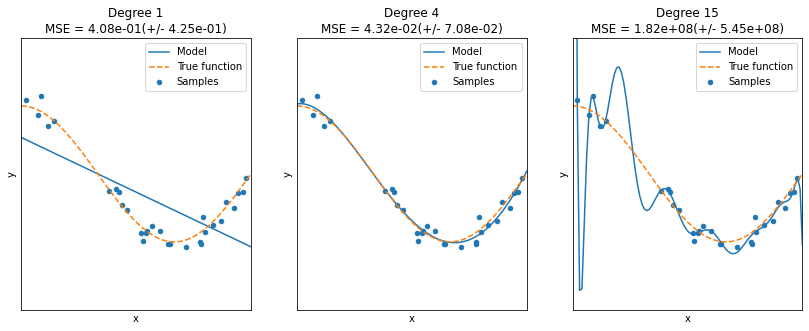

In [86]:
# 시각화하기
plt.figure(figsize = (14,5))
degrees = [1,4,15]  # 테스트 할 degree 설정(하이퍼 파라미터)

# plt.subplots() : 여러축 생성, subplot() : 한개축 생성
for i in range(len(degrees)):
    ax = plt.subplot(1,len(degrees),i+1)  # 축 생성
    plt.setp(ax, xticks=(), yticks=())   # 빈 튜플은 tick을 없애라는 것을 의미
    
    # 개별 degree 별로 Polynomial 변환
    poly_feat = PolynomialFeatures(degree=degrees[i])    
    # 선형회귀 객체 생성
    linear_reg = LinearRegression()
    # Pipieline 객체 생성
    pipeline = Pipeline([('poly', poly_feat),('lreg', linear_reg)])
    # 학습
    pipeline.fit(X.reshape(-1, 1), y)   # 나중에 행렬 내적곱 하려면, 2차원 ndarrray로 변환되어야 하므로 resahpe(-1,1)해주기
    # 교차 검증 : 오차(평가)
    scores = cross_val_score(
          pipeline # 모델
        , X.reshape(-1,1)   # test data
        , y
        , scoring='neg_mean_squared_error'     # 평가 지표 지정
        , cv= 10   # cross_val 개수 지정
        )
    
    # 계수(가중치) 저장
    coef__ = pipeline.named_steps['lreg'].coef_
    # 정확도 출력
    print('Degree {0} MSE는 {1:.2f} 입니다.'.format(degrees[i], -1 * np.mean(scores)))
    # 시각화 :  0부터 1 까지 테스트 데이터를 100개 생성 -> 예측
    X_test = np.linspace(0,1,100)  # (start, end, 나눌 개수)
    # 예측값 곡선(Model의 곡선)
    plt.plot(  X_test
             , pipeline.predict(X_test[:, np.newaxis])  # y축 값 = 예측값, newaxis : 축 추가해서 2차원으로 차원변경
             , label = 'Model'
            )
    # 실제값 곡선(랜덤으로 노이즈 줘서 만든 y값 곡선)
    plt.plot(X_test, true_func(X_test), '--', label="True function")

    # 데이터 분포(산점도, 랜덤으로 노이즈 줘서 만든 y값 자체)
    plt.scatter(
        X  # 원래 데이터
        , y # 원래 답
        , s=20
        ,label = 'Samples'
    )
    
    # 나머지 설정
    plt.xlabel('x')
    plt.ylabel('y')
    plt.xlim((0,1))
    plt.ylim((-2,2))
    plt.legend(loc='best')   #location = 'best' 최적 자리에 넣어라 디폴트
    
    # title 지정 
    out_str = 'Degree {}\nMSE = {:.2e}(+/- {:.2e})'
    plt.title(out_str.format(degrees[i], -scores.mean(), scores.std()))
              
#     plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))
    
plt.show()
    
    
    
    

위에서 Degree 1은 Underfitting 상태
Degree 15는 Overfitting 상태

Degree 4가 적절한 파라미터임
p.317

In [55]:
# np.newaxis 예제 (새로운 축 생성)
arr = np.arange(4)
print(arr.shape, arr)

(4,) [0 1 2 3]


In [61]:
# arr을 col 2차원으로 변경
arr2 = arr[:, np.newaxis]
arr2.shape, arr2

((4, 1),
 array([[0],
        [1],
        [2],
        [3]]))

In [60]:
# arr을 row 2차원으로 변경
arr3 = arr[np.newaxis, :]
arr3.shape, arr3

((1, 4), array([[0, 1, 2, 3]]))

In [70]:
arr = np.arange(3*3).reshape(3,3)
arr, arr.shape

(array([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]]),
 (3, 3))

In [67]:
arr_3d = arr[np.newaxis, ..., np.newaxis]
arr_3d

array([[[[0],
         [1],
         [2]],

        [[3],
         [4],
         [5]],

        [[6],
         [7],
         [8]]]])

In [68]:
arr_3d.shape

(1, 3, 3, 1)

In [69]:
np.newaxis == None

True

In [73]:
arr_4d = arr_3d[np.newaxis, ..., np.newaxis]
arr_4d.shape

(1, 1, 3, 3, 1, 1)